In [12]:
import pandas as pd
import numpy as np 
from scipy import stats

In [2]:
df = pd.read_csv('Desktop/Website_Traffic_Analysis/traffic.csv')

In [3]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [13]:
df.shape # to get(# of rows, # of columns)

(226278, 9)

# Q1: [Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [16]:
df.event.unique() # find unique values in a column

array(['click', 'preview', 'pageview'], dtype=object)

In [18]:
df.event.value_counts() # find unique values and count their frequency

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [27]:
df1 = df[df['event']=='pageview'] # filter for pageview according to the question
df1

,event,date,country,city,artist,album,track,isrc,linkid
84043,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84044,pageview,2021-08-19,United States,Absecon,KA$HDAMI,epiphany,Reparations!,QZFYY2115255,9c61dba1-9369-4ee4-a215-1d34581cd811
84045,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84046,pageview,2021-08-19,Ireland,Mullingar,Cardi B,Up,Up,USAT22100061,9d847c0e-6824-438f-9dc1-d76fca6dc87c
84047,pageview,2021-08-19,United Kingdom,Northampton,"Kayla Nicole, Taylor Girlz, Flo Milli","Bundles 2 (feat. Flo Milli, Taylor Girlz)","Bundles 2 (feat. Flo Milli, Taylor Girlz)",QMCE32100359,fbf4b935-f961-4b13-b1d8-45ad47093559
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


# the number of page view event

In [28]:
len(df1.event) # first solution 

142015

In [41]:
df1.shape[0] # second solution 

142015

# the number of pageview events per day

In [40]:
df1.groupby(['date']).size()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
dtype: int64

# attention: here the same user might visit the same page multiple times in the same date --> no need for dropping duplicates!!!!!

# what if we drop the duplicates???

In [42]:
df1_drop = df1.drop_duplicates()

In [45]:
df1_drop.shape[0] # compare to the original table, number of rows decrease!

73360

In [46]:
df1_drop.groupby('date').size() # compare to the original table, number of pageviews decrease per day!

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
dtype: int64

# Q2: [Pandas] What about the other recorded events?

In [47]:
df2 = df[df['event']=='click'] 
df3 = df[df['event']=='preview']

In [48]:
df2.shape[0]

55732

In [49]:
df3.shape[0]

28531

In [50]:
df2.groupby('date').size()

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
dtype: int64

In [51]:
df3.groupby('date').size()

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
dtype: int64

# another way is to analyze the datasets after removing the 'pageviews'

In [54]:
events = set(df['event'].unique())
events

{'click', 'pageview', 'preview'}

In [55]:
events.remove('pageview')

In [56]:
events

{'click', 'preview'}

In [65]:
# loop over each event in events
for event in events:
    total_event = df[df['event']==event].shape[0]
    print('The number of', event,'is',total_event)
    date = df[df['event']==event].groupby('date').size()
    print(event, 'event distribution is shown below:', date)

The number of click is 55732
click event distribution is shown below: date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
dtype: int64
The number of preview is 28531
preview event distribution is shown below: date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
dtype: int64


# Q3: [Pandas] Which countries did the pageviews come from?

In [67]:
df1.head()

,event,date,country,city,artist,album,track,isrc,linkid
84043,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84044,pageview,2021-08-19,United States,Absecon,KA$HDAMI,epiphany,Reparations!,QZFYY2115255,9c61dba1-9369-4ee4-a215-1d34581cd811
84045,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84046,pageview,2021-08-19,Ireland,Mullingar,Cardi B,Up,Up,USAT22100061,9d847c0e-6824-438f-9dc1-d76fca6dc87c
84047,pageview,2021-08-19,United Kingdom,Northampton,"Kayla Nicole, Taylor Girlz, Flo Milli","Bundles 2 (feat. Flo Milli, Taylor Girlz)","Bundles 2 (feat. Flo Milli, Taylor Girlz)",QMCE32100359,fbf4b935-f961-4b13-b1d8-45ad47093559


In [76]:
pd.DataFrame(df1.country.unique()) # remember to drop null values!!!

,0
0,Saudi Arabia
1,United States
2,Ireland
3,United Kingdom
4,France
...,...
207,Afghanistan
208,Central African Republic
209,Guernsey
210,Sint Maarten


In [75]:
pd.DataFrame(df1.country.dropna().unique())

,0
0,Saudi Arabia
1,United States
2,Ireland
3,United Kingdom
4,France
...,...
206,Afghanistan
207,Central African Republic
208,Guernsey
209,Sint Maarten


# Q4: [Pandas] What was the overall click rate (clicks/pageviews)?

In [78]:
df2.shape[0]/df1.shape[0]

0.3924374185825441

# we need to look at the click rate for each linkid

In [86]:
pageview = df1.groupby('linkid').size().to_frame('pageviews').reset_index()
pageview

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1
...,...,...
3832,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
3833,fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,2
3834,fff84c0e-90a1-59d8-9997-adc909d50e16,1
3835,fffc17a7-f935-5d3e-bd3e-d761fd80d479,2


In [88]:
clicks=df2.groupby('linkid').size().to_frame('clicks').reset_index()
clicks

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3
...,...,...
2250,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29
2251,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
2252,fff84c0e-90a1-59d8-9997-adc909d50e16,1
2253,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1


In [92]:
together = clicks.merge(pageview, how='inner')[['linkid','clicks','pageviews']]

In [94]:
together['rate']=together['clicks']/together['pageviews']
together

,linkid,clicks,pageviews,rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


# Q5: [Pandas] How does the clickrate distribute across different links?

In [ ]:
## I will look at the rate distribution --> Plot a histogram 
# inpsired by: https://winder.ai/histograms-and-skewed-data/

In [99]:
clickrate=together['rate']
clickrate

0       1.000000
1       1.000000
2       0.666667
3       0.222222
4       0.750000
          ...   
2248    0.345238
2249    1.000000
2250    1.000000
2251    0.500000
2252    0.500000
Name: rate, Length: 2253, dtype: float64

In [101]:
clickrate.describe() # get a quick sense of the distribution 

## the distribution can be skewed 

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: rate, dtype: float64

Text(0.5, 0, 'Click Rate')

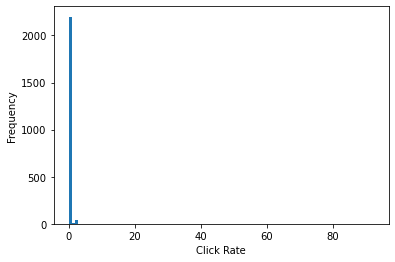

In [111]:
ax = clickrate.plot(kind='hist', bins=100)
ax.set_xlabel('Click Rate')

<AxesSubplot:ylabel='Density'>

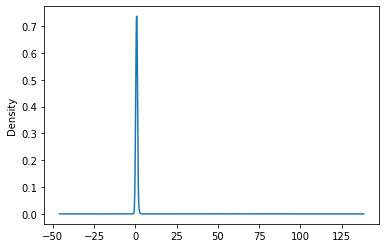

In [113]:
clickrate.plot(kind='kde') # kernel density distribution --> a smooth curve that summerize the distribution 

# when the data is skewed --> indicating some sort of power law, or exponential --> transform the data format

# Maybe log law?

In [106]:
clickrate_log = clickrate.apply(np.log)
## we’re not altering the data, we’re just changing how it is represented.

Text(0.5, 0, 'Click Rate(Log)')

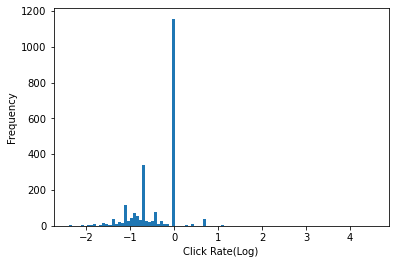

In [118]:
ax1=clickrate_log.plot(kind='hist', bins=100) # look better!
ax1.set_xlabel('Click Rate(Log)')

# The Logged click rates are centered around 0 --> indicates that click rate is center on 1 --> # of click = # of pageviews

# Maybe square law?

In [109]:
click_sq = clickrate.apply(np.sqrt)

Text(0.5, 0, 'Click Rate(SQRT)')

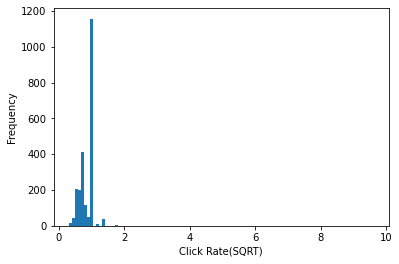

In [117]:
ax2 = click_sq.plot(kind='hist', bins=100) ## it does not look good --> I will stick with the log law :)
ax2.set_xlabel('Click Rate(SQRT)')

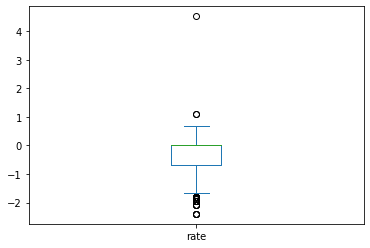

In [119]:
ax3=clickrate_log.plot(kind='box')

In [ ]:
# from the boxplot, there are two outliers. And most of the data are below the Q1

# Q6: [Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [122]:
stats.pearsonr(together['clicks'],together['pageviews']) # Pearson's r 

#Scipy
#(correlation, p value)

(0.9939838266311453, 0.0)

In [126]:
new = together.drop(columns='rate')
new.corr() # Pandas

,clicks,pageviews
clicks,1.000000,0.993984
pageviews,0.993984,1.000000


# clicks and pageviews are possitively correlated. It makes sense because click is the premise of pageview